# Bibliotecas

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
import itertools
import ast
from collections import deque
import random

# Base

In [3]:
df_completo = pd.read_csv("RAW_recipes.csv")

In [4]:
df_filtrado = df_completo[['name', 'ingredients']]
df_filtrado.head()

,name,ingredients
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar..."


# Transformando em grafo()

In [5]:
class AdjacencyList:
    def __init__(self, vertices, edges):
        self.vertices = sorted(list(set(vertices))) # Garante vértices únicos e ordenados
        self.edges = self._canonize_edges(edges)    # Garante arestas no formato (min, max)
        self.adjacency_list = {v: [] for v in self.vertices}
        for u, v in self.edges:
            self.adjacency_list[u].append(v)
            self.adjacency_list[v].append(u)

    def _canonize_edges(self, edges):
        """Converte todas as arestas para um formato canônico (menor, maior) para evitar duplicatas."""
        edge_set = set()
        for u, v in edges:
            edge_set.add(tuple(sorted((u, v))))
        return list(edge_set)

    def render_graph(self, title="Grafo"):
        """Renderiza o grafo usando networkx."""
        g = nx.Graph()
        g.add_nodes_from(self.vertices)
        g.add_edges_from(self.edges)
        
        if not self.vertices:
            print("Grafo vazio, nada para renderizar.")
            return

        plt.figure(figsize=(14, 14))
        pos = nx.spring_layout(g, k=0.2, iterations=30)
        nx.draw(g, pos, with_labels=True, node_size=200, font_size=9, node_color='skyblue', edge_color='gray', width=1.5)
        plt.title(title, fontsize=16)
        plt.show()

# Questao 6

In [6]:
def calcular_raio(graph: AdjacencyList):
    g_nx = nx.Graph()
    g_nx.add_nodes_from(graph.vertices)
    g_nx.add_edges_from(graph.edges)

    if not nx.is_connected(g_nx):
        print("O grafo não é conectado. O raio é infinito.")
        return float('inf')
    
    return nx.radius(g_nx)

# 7

In [7]:
def gerar_arvore_de_abrangencia(graph: AdjacencyList):
    if not graph.vertices:
        return AdjacencyList([], [])

    g_nx = nx.Graph()
    g_nx.add_nodes_from(graph.vertices)
    g_nx.add_edges_from(graph.edges)

    if not nx.is_connected(g_nx):
        print("O grafo não é conectado, não é possível gerar uma árvore de abrangência.")
        return None
        
    mst_edges = list(nx.bfs_edges(g_nx, source=graph.vertices[0]))
    arvore = AdjacencyList(graph.vertices, mst_edges)
    return arvore


# 7.1

In [8]:
def gerar_outras_arvores_abrangencia(graph_original: AdjacencyList, arvore_inicial: AdjacencyList, k: int):

    edges_g = set(graph_original.edges)
    edges_a1 = set(arvore_inicial.edges)
    
    non_tree_edges = list(edges_g - edges_a1)
    
    if not non_tree_edges:
        print("O grafo original já é uma árvore. Não há outras árvores de abrangência para gerar.")
        return []
    
    g_a1_nx = nx.Graph()
    g_a1_nx.add_nodes_from(arvore_inicial.vertices)
    g_a1_nx.add_edges_from(arvore_inicial.edges)

    novas_arvores = []
    edges_geradas = {frozenset(e) for e in arvore_inicial.edges} 
    
    tentativas = 0
    
    while len(novas_arvores) < k and tentativas < len(non_tree_edges) * 5:
        edge_to_add = random.choice(non_tree_edges)
        u, v = edge_to_add
        
        path_vertices = nx.shortest_path(g_a1_nx, source=u, target=v)
        
        cycle_path_edges = []
        for i in range(len(path_vertices) - 1):
            edge = tuple(sorted((path_vertices[i], path_vertices[i+1])))
            cycle_path_edges.append(edge)
            
      
        edge_to_remove = random.choice(cycle_path_edges)
        

        new_edges = list(edges_a1)
        new_edges.remove(edge_to_remove)
        new_edges.append(edge_to_add)
        
        if frozenset(new_edges) not in edges_geradas:
            nova_arvore = AdjacencyList(graph_original.vertices, new_edges)
            novas_arvores.append(nova_arvore)
            edges_geradas.add(frozenset(new_edges))
        
        tentativas += 1

    if len(novas_arvores) < k:
        print(f"Aviso: Foi possível gerar apenas {len(novas_arvores)} árvores distintas.")

    return novas_arvores

# 8

In [9]:

def calcular_distancia_arvores(arvore1: AdjacencyList, arvore2: AdjacencyList):
    edges1_set = set(arvore1.edges)
    edges2_set = set(arvore2.edges)

    distancia = len(edges1_set.difference(edges2_set))
    return distancia

# 9

In [10]:
def determinar_centro_grafo(graph: AdjacencyList):

    g_nx = nx.Graph()
    g_nx.add_nodes_from(graph.vertices)
    g_nx.add_edges_from(graph.edges)

    if not nx.is_connected(g_nx):
        print("O grafo não é conectado. Não possui um centro.")
        return []
        
    return nx.center(g_nx)

# Frunção main

In [11]:
num_receitas_str = input("Digite o número de receitas que deseja analisar (ex: 25): ")
num_receitas = int(num_receitas_str)

--- Grafo de Ingredientes Original (Amostra) ---
Vértices: 7, Arestas: 21




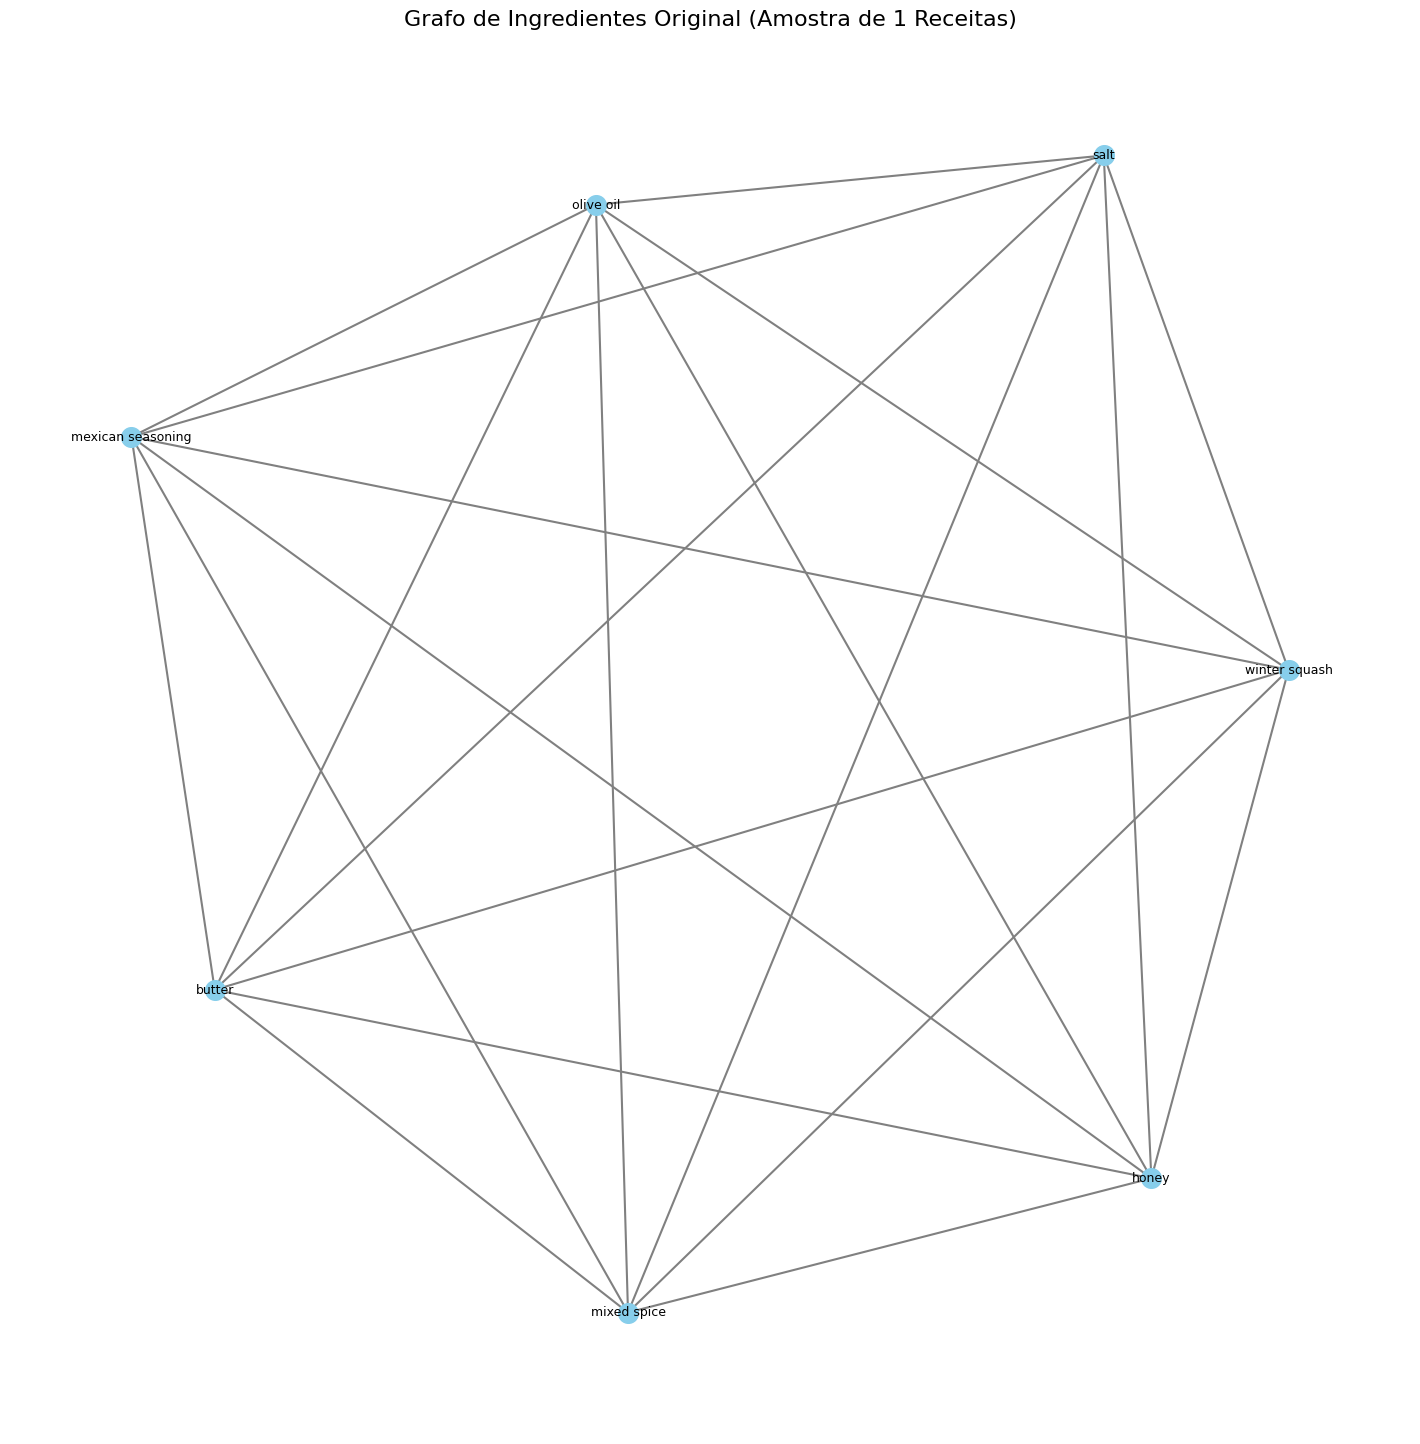



--- Tarefa 6: Calculando o Raio do Grafo ---
O raio do grafo de ingredientes é: 1


--- Tarefa 7: Gerando uma Árvore de Abrangência (A1) ---
Árvore de abrangência A1 gerada com sucesso.
Vértices: 7, Arestas: 6


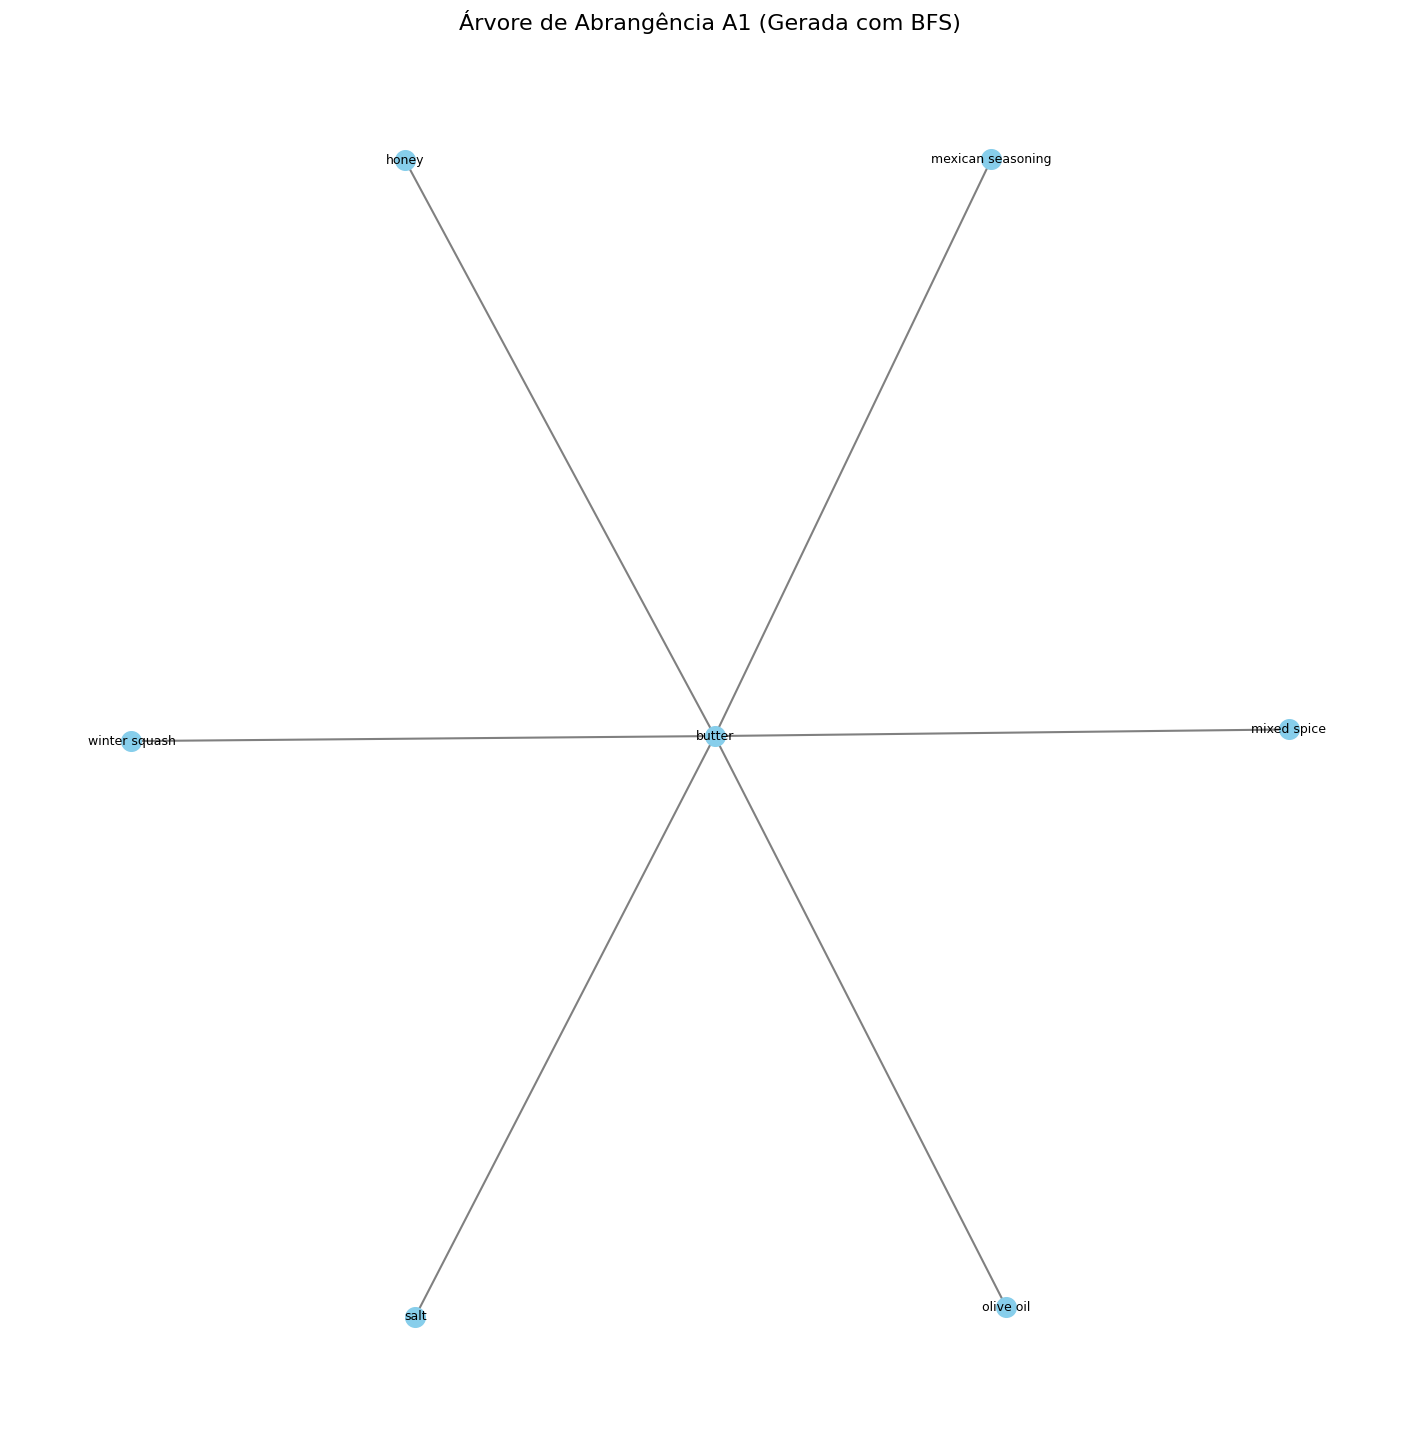

--- Tarefa 7.1: Gerando 2 outras árvores por Troca Cíclica ---
Foram geradas 2 novas árvores.


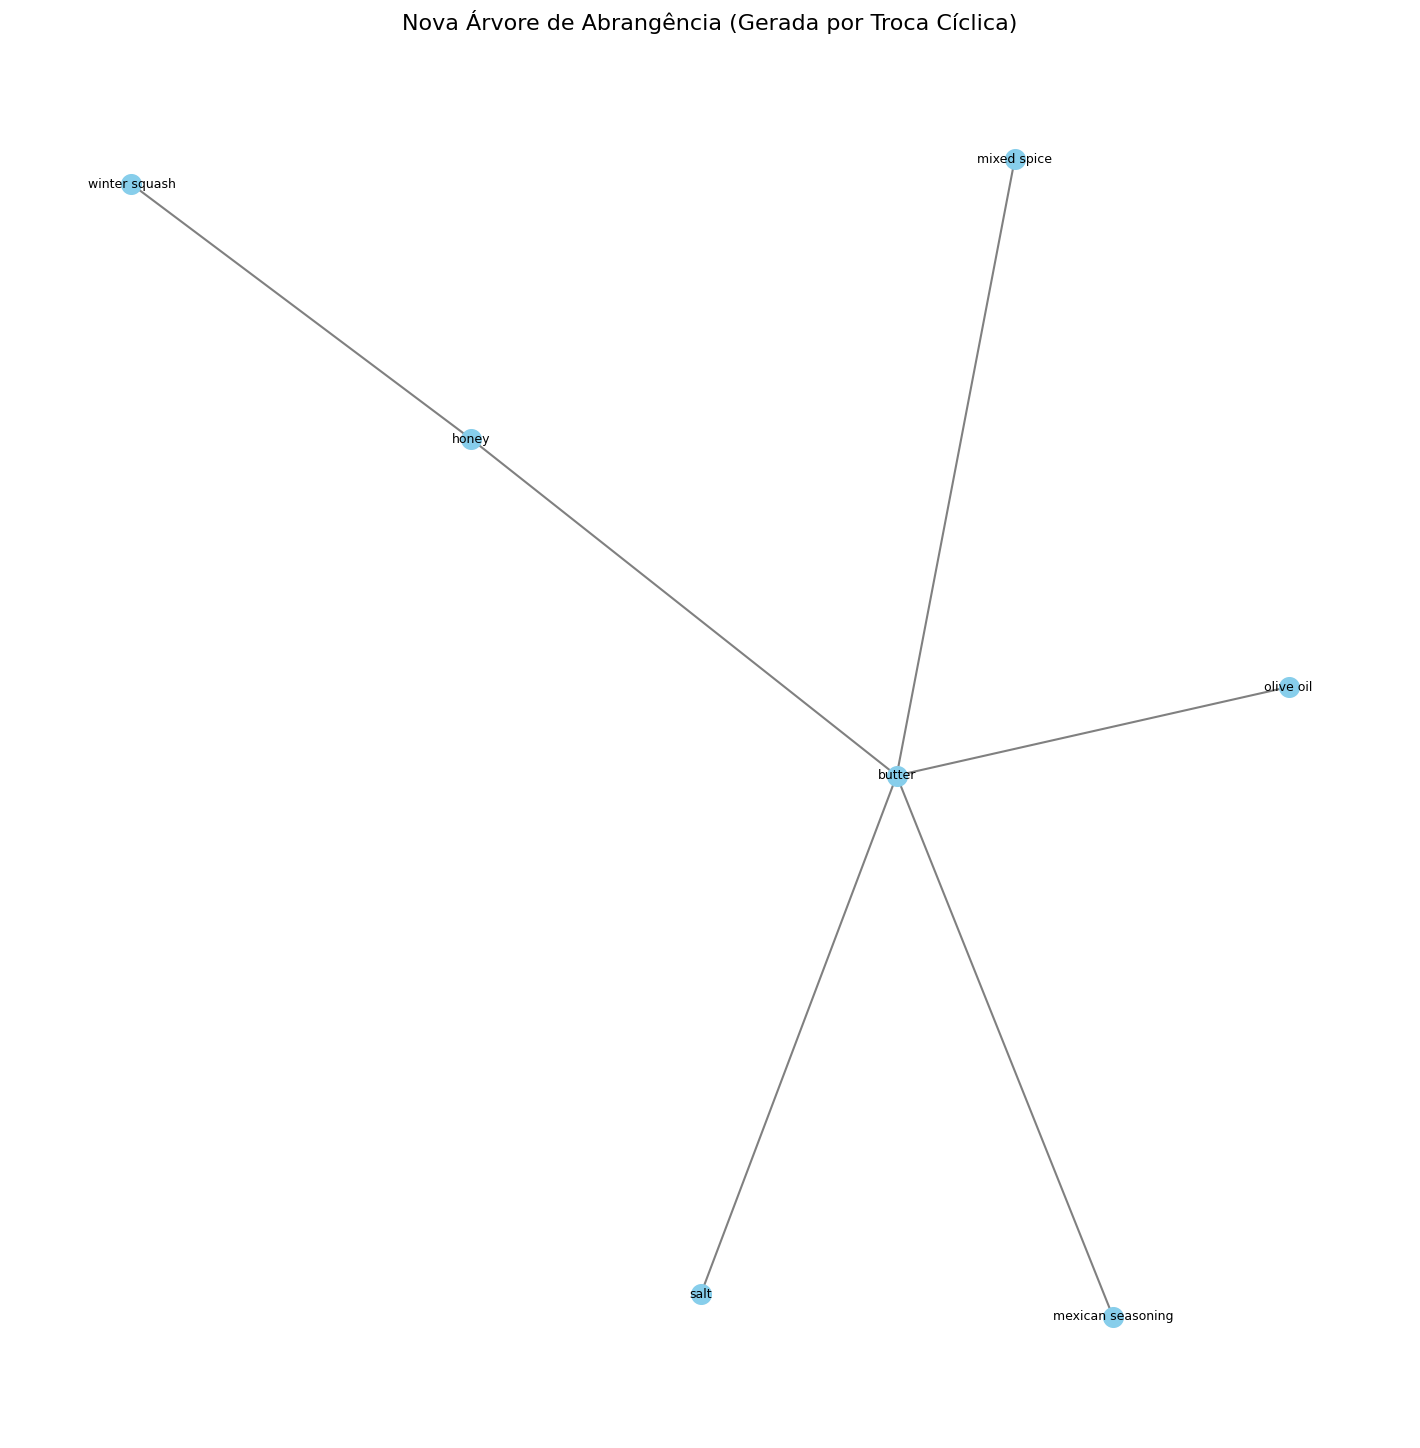



--- Tarefa 8: Calculando a Distância entre Árvores ---
Mostrando a Árvore A1 (gerada com Busca em Largura - BFS):


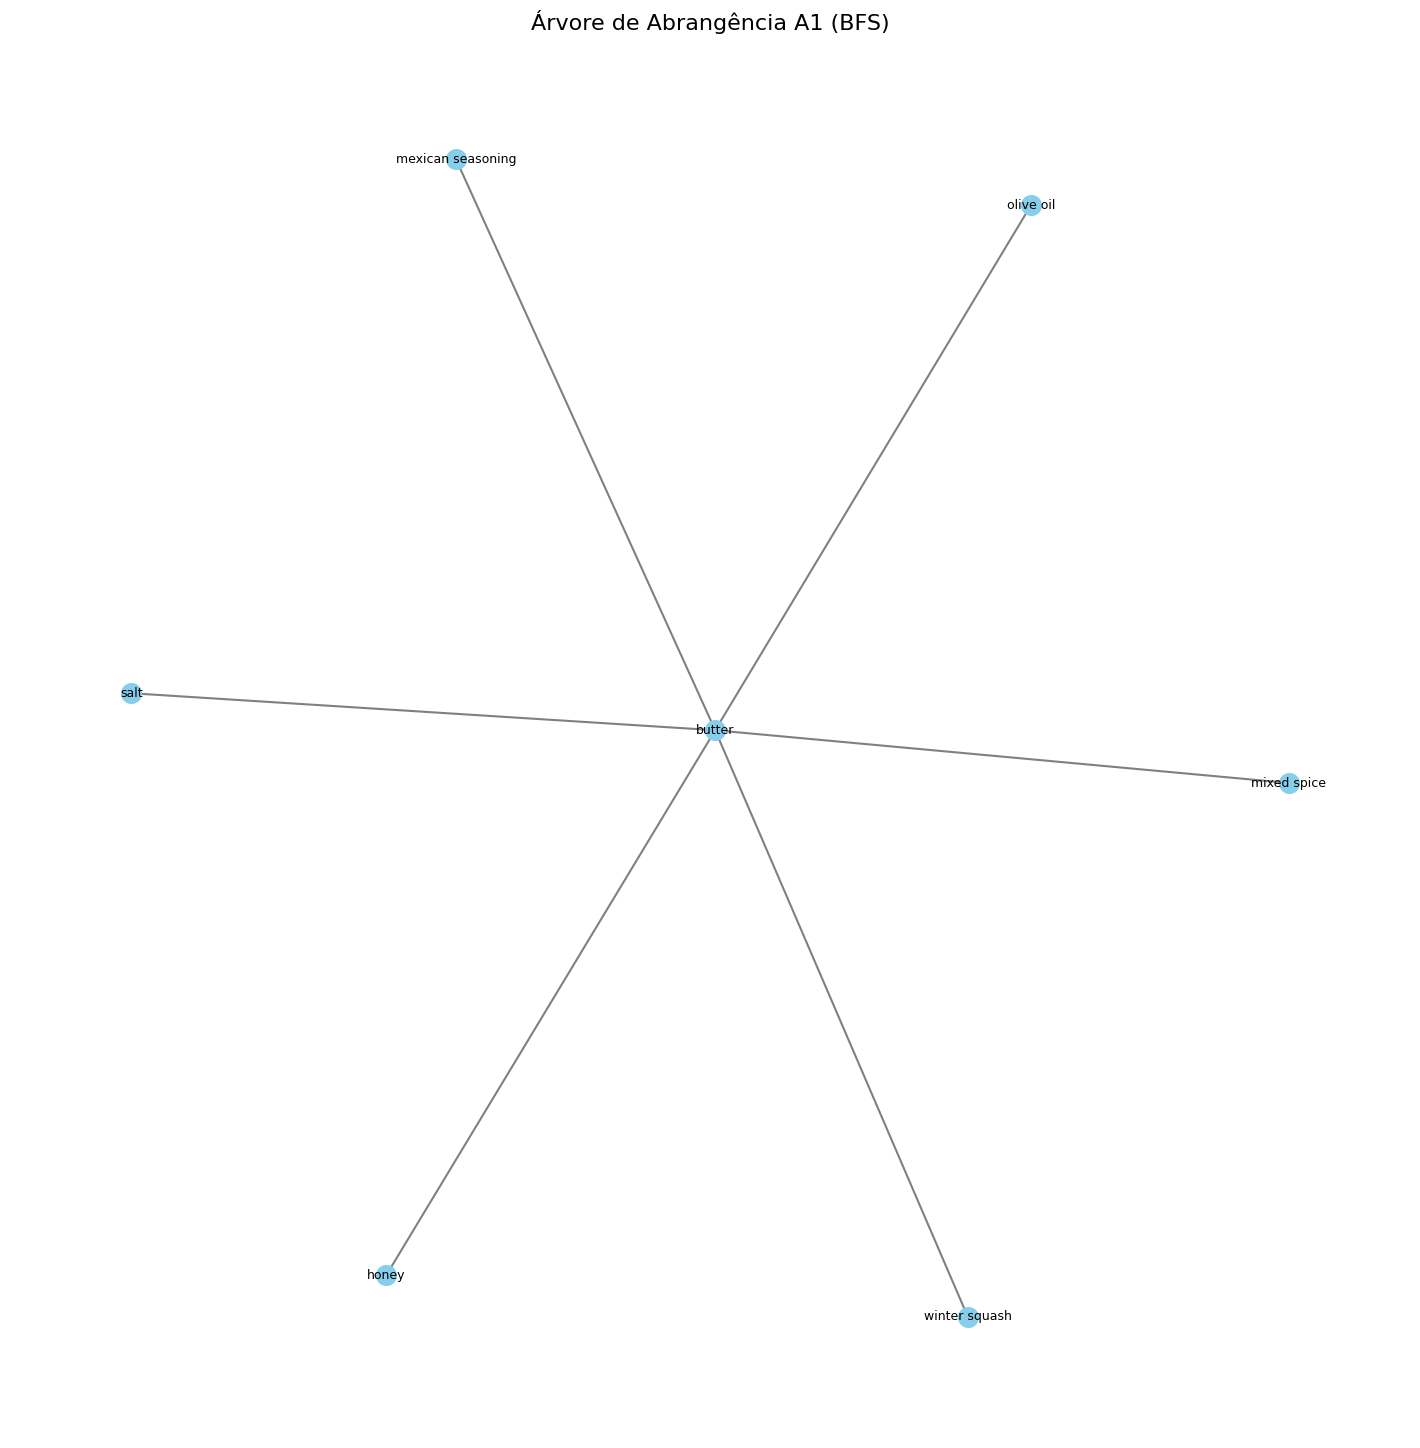


Gerando e mostrando a Árvore A2 (gerada com Busca em Profundidade - DFS):


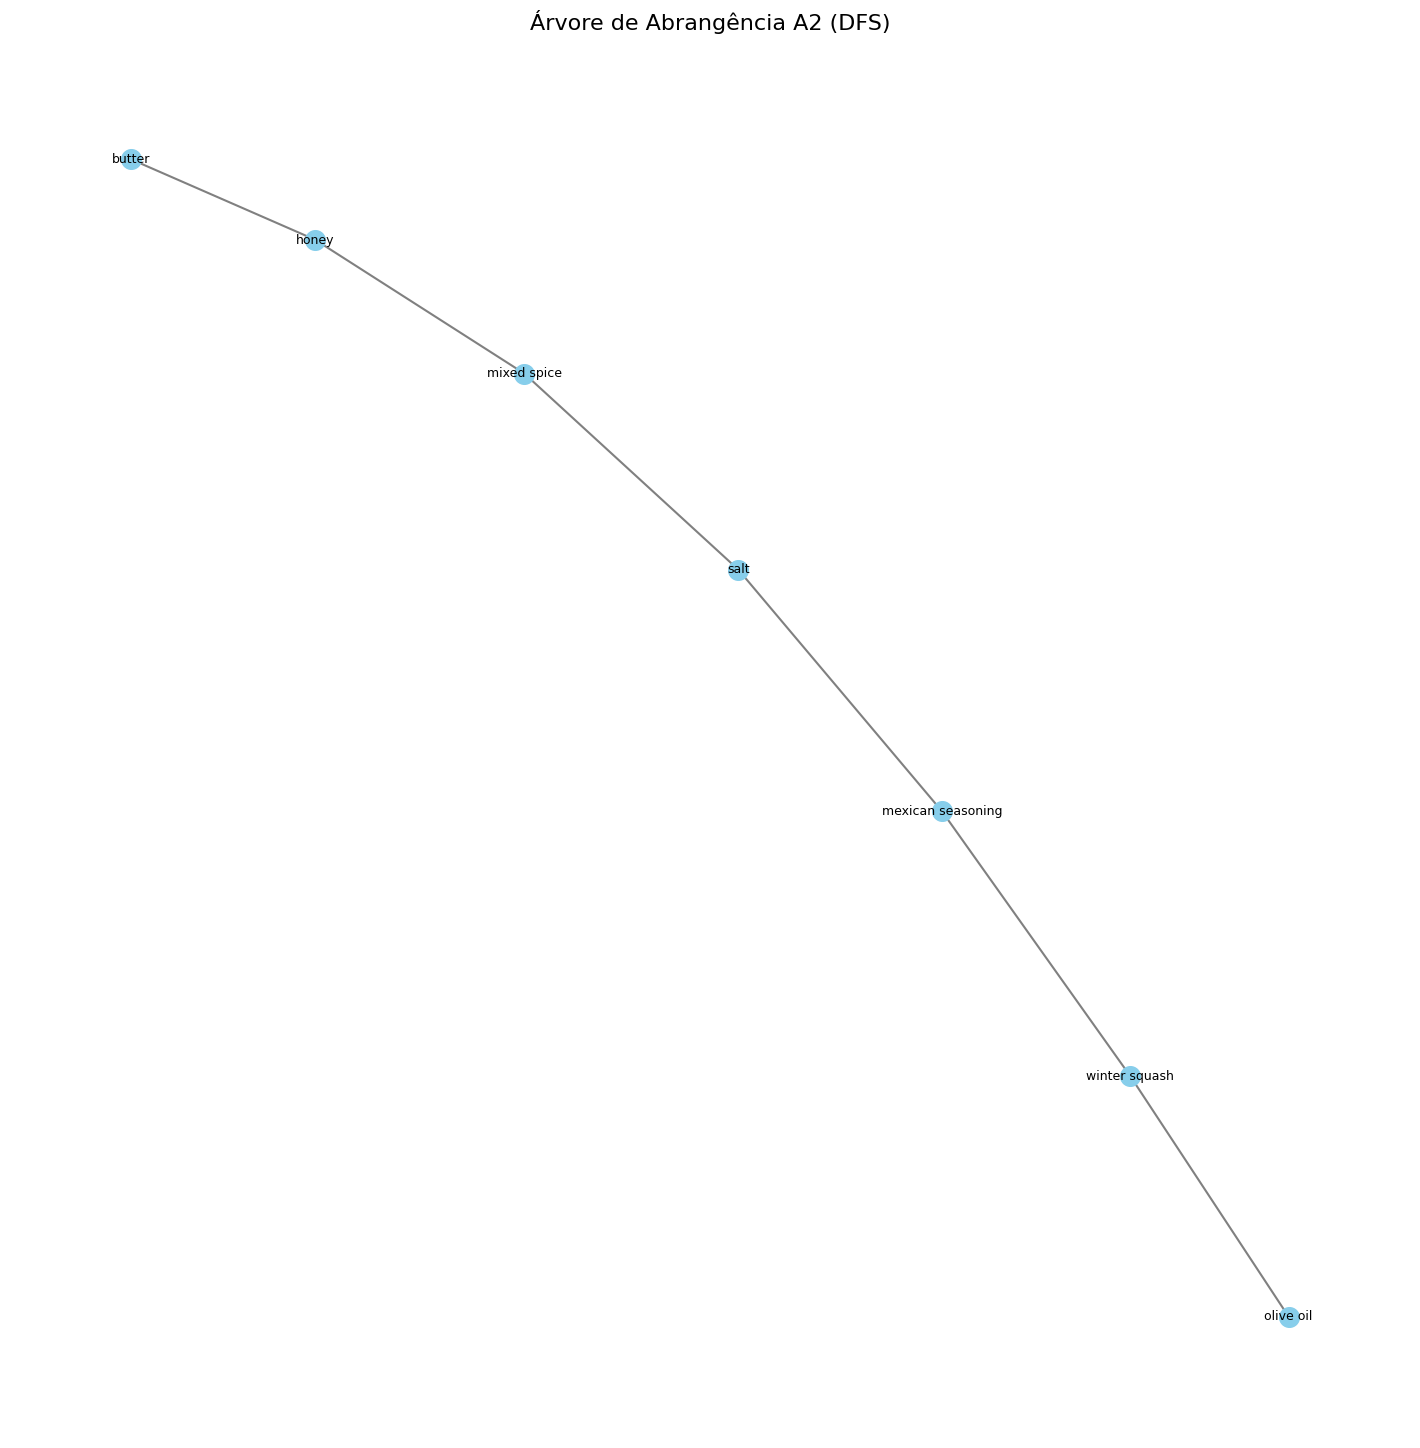


A distância entre a árvore A1 (BFS) e A2 (DFS) é: 5


--- Tarefa 9: Determinando o Centro do Grafo ---
O raio do grafo é 1. Os vértices centrais (com excentricidade == raio) são:
['butter', 'honey', 'mexican seasoning', 'mixed spice', 'olive oil', 'salt', 'winter squash']


In [12]:
if __name__ == "__main__":

    df_amostra = df_filtrado.head(num_receitas)

    all_ingredients_set = set()
    for ingredients_list_str in df_amostra['ingredients']:
        ingredients_list = ast.literal_eval(ingredients_list_str)
        all_ingredients_set.update(ingredients_list)
    vertices_amostra = list(all_ingredients_set)

    edge_set = set()
    for ingredients_list_str in df_amostra['ingredients']:
        ingredients_list = ast.literal_eval(ingredients_list_str)
        if len(ingredients_list) >= 2:
            unique_ingredients_in_recipe = sorted(list(set(ingredients_list)))
            for edge in itertools.combinations(unique_ingredients_in_recipe, 2):
                edge_set.add(edge)
    edges_amostra = list(edge_set)

    # Criando o grafo principal a partir da amostra
    grafo_ingredientes = AdjacencyList(vertices_amostra, edges_amostra)
    print("--- Grafo de Ingredientes Original (Amostra) ---")
    print(f"Vértices: {len(grafo_ingredientes.vertices)}, Arestas: {len(grafo_ingredientes.edges)}")
    # grafo_ingredientes.render_graph("Grafo de Ingredientes Original (Amostra de 20 Receitas)")
    
    print("\n" + "="*50 + "\n")


    grafo_ingredientes.render_graph(f"Grafo de Ingredientes Original (Amostra de {num_receitas} Receitas)")
    
    print("\n" + "="*50 + "\n")

    # 2. EXECUTANDO AS TAREFAS
    
    # Tarefa 6: Raio
    print("--- Tarefa 6: Calculando o Raio do Grafo ---")
    raio = calcular_raio(grafo_ingredientes)
    print(f"O raio do grafo de ingredientes é: {raio}")
    
    print("\n" + "="*50 + "\n")

    # Tarefa 7: Árvore de Abrangência
    print("--- Tarefa 7: Gerando uma Árvore de Abrangência (A1) ---")
    arvore1 = gerar_arvore_de_abrangencia(grafo_ingredientes)
    if arvore1:
        print(f"Árvore de abrangência A1 gerada com sucesso.")
        print(f"Vértices: {len(arvore1.vertices)}, Arestas: {len(arvore1.edges)}")
        arvore1.render_graph("Árvore de Abrangência A1 (Gerada com BFS)")

        # Tarefa 7.1: Outras Árvores por Troca Cíclica
        print("--- Tarefa 7.1: Gerando 2 outras árvores por Troca Cíclica ---")
        outras_arvores = gerar_outras_arvores_abrangencia(grafo_ingredientes, arvore1, k=2)
        if outras_arvores:
            print(f"Foram geradas {len(outras_arvores)} novas árvores.")
            # Vamos visualizar a primeira nova árvore gerada
            outras_arvores[0].render_graph("Nova Árvore de Abrangência (Gerada por Troca Cíclica)")
        else:
            print("Não foi possível gerar novas árvores.")

    else:
        print("Não foi possível gerar a árvore A1, pulando as tarefas dependentes.")
    
    print("\n" + "="*50 + "\n")

# --- TAREFA 8 (COM VISUALIZAÇÃO DAS DUAS ÁRVORES) ---
    print("--- Tarefa 8: Calculando a Distância entre Árvores ---")
    if arvore1:
        # Primeiro, vamos mostrar a Árvore A1 (BFS) que será usada
        print("Mostrando a Árvore A1 (gerada com Busca em Largura - BFS):")
        arvore1.render_graph("Árvore de Abrangência A1 (BFS)")

        # Agora, geramos e mostramos a Árvore A2 (DFS)
        print("\nGerando e mostrando a Árvore A2 (gerada com Busca em Profundidade - DFS):")
        g_nx_temp = nx.Graph(grafo_ingredientes.edges)
        edges_dfs = list(nx.dfs_edges(g_nx_temp, source=grafo_ingredientes.vertices[0]))
        arvore2 = AdjacencyList(grafo_ingredientes.vertices, edges_dfs)
        arvore2.render_graph("Árvore de Abrangência A2 (DFS)")
        
        # Finalmente, calculamos e exibimos a distância
        dist = calcular_distancia_arvores(arvore1, arvore2)
        print(f"\nA distância entre a árvore A1 (BFS) e A2 (DFS) é: {dist}")
    else:
        print("Não foi possível executar a Tarefa 8 pois a árvore A1 não foi gerada.")


    print("\n" + "="*50 + "\n")
    
    # Tarefa 9: Centro do Grafo
    print("--- Tarefa 9: Determinando o Centro do Grafo ---")
    centro = determinar_centro_grafo(grafo_ingredientes)
    print(f"O raio do grafo é {raio}. Os vértices centrais (com excentricidade == raio) são:")
    print(centro)